In [28]:
import sys
from pathlib import Path

# Add the project root to sys.path
project_root = Path().resolve().parent  # Adjust as needed to point to the root folder
sys.path.append(str(project_root))

print(sys.path)  # Check if the path is added


['C:\\Program Files\\Python310\\python310.zip', 'C:\\Program Files\\Python310\\DLLs', 'C:\\Program Files\\Python310\\lib', 'C:\\Program Files\\Python310', 'g:\\Work\\DS\\neural-net-from-scratch\\.venv', '', 'g:\\Work\\DS\\neural-net-from-scratch\\.venv\\lib\\site-packages', 'g:\\Work\\DS\\neural-net-from-scratch\\.venv\\lib\\site-packages\\win32', 'g:\\Work\\DS\\neural-net-from-scratch\\.venv\\lib\\site-packages\\win32\\lib', 'g:\\Work\\DS\\neural-net-from-scratch\\.venv\\lib\\site-packages\\Pythonwin', 'G:\\Work\\DS\\neural-net-from-scratch', 'G:\\Work\\DS\\neural-net-from-scratch']


### Import MNIST dataset

https://www.kaggle.com/competitions/digit-recognizer/data

In [29]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt
from os.path  import join
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#
# Set file paths based on added MNIST Datasets
#
input_path = '../data'
data = np.array(pd.read_csv(join(input_path, 'train.csv')))
m, n = data.shape
print(m)
print(n)

train_set, dev_set = train_test_split(data, test_size=0.2, random_state=42)
X_train = train_set[:100, 1:n]
y_train = train_set[:100, 0:1]
X_dev = dev_set[:20, 1:n]
y_dev = dev_set[:20, 0:1]

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1



42000
785


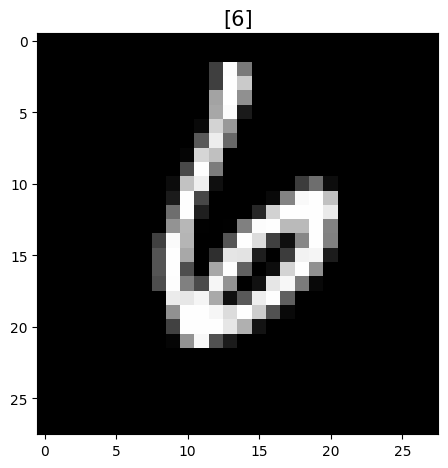

In [30]:
show_images([X_train[0].reshape(28, 28)], [y_train[0]])

In [31]:
X_train.shape

(100, 784)

#### One-Hot Encode Digit Values

In [44]:
from sklearn.preprocessing import OneHotEncoder

digit_encoder = OneHotEncoder()
y_train_hot = digit_encoder.fit_transform(y_train).toarray().T
y_train_hot.shape

(10, 100)

### Description of Data
Handwritten digits in the form of 28 x 28 dimension array with values ranging from 0 (black) to 255 (white) <br> <br>

$$dim \space x_i = 28 * 28 \newline$$

Total Training Samples = 60000

### Input Layer

Dim: 784 x samples, each column is a sample

$$ A^{(0)} = \begin{bmatrix} x_{0, 0} & x_{0, 1} & \cdots & x_{0, n_{samples}} \\ x_{1, 0} & x_{1, 1} & \cdots & x_{1, n_{samples}} \\ \vdots & \vdots & \ddots & \vdots \\ x_{783, 0} & x_{783, 1} & \cdots & x_{783, n_{samples}} \end{bmatrix}$$

### 1st Hidden Layer
Dim: 28 x samples, each column is a sample
$$ A^{(1)} = \begin{bmatrix} x_{0, 0} & x_{0, 1} & \cdots & x_{0, n_{samples}} \\ x_{1, 0} & x_{1, 1} & \cdots & x_{1, n_{samples}} \\ \vdots & \vdots & \ddots & \vdots \\ x_{27, 0} & x_{27, 1} & \cdots & x_{27, n_{samples}} \end{bmatrix}$$

### Weights and Biases

$$A^{(1)} = W^{(1)}A^{(0)} + b^{(1)}$$

$\sigma $ is sigmoid function<br>
W is a matrix of dim 28 x 784 <br>
b is a matrix of dim 28 x 1

### 2nd Hidden Layer
Dim: 28 x samples
$$ A^{(2)} = \begin{bmatrix} x_{0, 0} & x_{0, 1} & \cdots & x_{0, n_{samples}} \\ x_{1, 0} & x_{1, 1} & \cdots & x_{1, n_{samples}} \\ \vdots & \vdots & \ddots & \vdots \\ x_{27, 0} & x_{27, 1} & \cdots & x_{27, n_{samples}} \end{bmatrix}$$
$$A^{(2)} = \sigma(W^{(2)}A^{(1)} + b^{(2)})$$

### Output Layer
Y is matrix of dim 10 x samples representing digits from 0 to 9
$$Y = \begin{bmatrix} y_{0}\\ y_{1}\\ \vdots \\ y_{9}\end{bmatrix}$$
$$Y = \sigma(W^{(y)}A^{(2)} + b^{(y)}) $$

#### Normalize Data between 0 and 1

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
A0 = scaler.fit_transform(X_train)
A0 = A0.reshape(784 , A0.shape[0])
A0

array([[0.        , 0.        , 0.        , ..., 0.99607843, 0.79215686,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.23921569,
        0.43307087],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### Initialize random weights

In [33]:
W1 = np.random.randn(28, 784)
b1 = np.random.rand(28, 1)
W2 = np.random.randn(28, 28)
b2 = np.random.rand(28, 1)
Wy = np.random.randn(10, 28)
by = np.random.rand(10, 1)

#### Sigmoid Function for Activation

In [54]:
import math

def sigmoid(x):
    return np.exp(x)/(1 + np.exp(x))

### Forward Propagation

In [ ]:
A1 = W1.dot(A0) + b1
Z2 = W2.dot(A1) + b2
A2 = sigmoid(Z2)
Zy = Wy.dot(A2) + by
Y = sigmoid(Zy)

In [52]:
Y.shape

(10, 100)

### MSE Loss
The squared error cost function is:

  $$C = \frac{1}{2m} \sum_{i=1}^m \sum_{j=1}^n (Y_{\text{pred}} - Y_{\text{true}} )^2$$
  where $ m $ is the number of training examples, $ Y_{\text{pred}} = Y $, and $ Y_{\text{true}} $ is the ground truth.

In [91]:
n = Y.shape[0]
m = Y.shape[1]
cost = np.sum(np.square(y_train_hot - Y)) / (2 * m)
cost

np.float64(2.1293917347677165)

### Backpropagation
Backpropagation is simply calculating the gradient $ \frac{\partial C}{\partial p}$ where C is the cost function and p is parameter like W or b for each parameter and then using this gradient to perform gradient descent to find optimal parameter values that minimize C. <br><br> $ \frac{\partial C}{\partial p}$ represents how much change in parameter p affects cost C
<br><br>

For the output layer $Y = \sigma(W^{(y)}A^{(2)} + b^{(y)}) $ <br>
$$ \frac{\partial C}{\partial W^{(y)}} = \frac{\partial C}{\partial Y} \cdot \frac{\partial Y}{\partial Z^{(y)}} \cdot \frac{\partial Z^{(y)}}{\partial W^{(y)}}  = -\frac{1}{m} \big( (Y - Y_{\text{true}}) \cdot Y \cdot (1 - Y) \big) A^{(2)}$$
$$ \frac{\partial C}{\partial b^{(y)}} = \frac{\partial C}{\partial Y} \cdot \frac{\partial Y}{\partial Z^{(y)}} \cdot \frac{\partial Z^{(y)}}{\partial b^{(y)}} = -\frac{1}{m} \big( (Y - Y_{\text{true}}) \cdot Y \cdot (1 - Y) \big)$$

In [92]:
dC_dZy = - ((Y - y_train_hot) * Y * (1-Y))/m
dZy_dWy = A2.T # Transpose for matching dimension

dC_dWy = np.dot(dC_dZy, dZy_dWy)
dC_dby = dC_dZy

For 2nd Hidden Layer $A^{(2)} = \sigma(W^{(2)}A^{(1)} + b^{(2)})$
$$ \frac{\partial C}{\partial W^{(2)}} = \frac{\partial C}{\partial Y} \cdot \frac{\partial Y}{\partial Z^{(y)}} \cdot \frac{\partial Z^{(y)}}{\partial A^{(2)}} \cdot \frac{\partial A^{(2)}}{\partial Z^{(2)}} \cdot \frac{\partial Z^{(2)}}{\partial W^{(2)}} = \frac{1}{m} \big( (Y - Y_{\text{true}}) \cdot Y \cdot (1 - Y) \cdot W^{(y)} \cdot A^{(2)}(1 - A^{(2)}) \cdot A^{(1)} \big)$$

$$ \frac{\partial C}{\partial b^{(2)}} = \frac{\partial C}{\partial Y} \cdot \frac{\partial Y}{\partial Z^{(y)}} \cdot \frac{\partial Z^{(y)}}{\partial A^{(2)}} \cdot \frac{\partial A^{(2)}}{\partial Z^{(2)}} \cdot \frac{\partial Z^{(2)}}{\partial b^{(2)}} = \frac{1}{m} \big( (Y - Y_{\text{true}}) \cdot Y \cdot (1 - Y) \cdot W^{(y)} \cdot A^{(2)}(1 - A^{(2)}) \big)$$


In [101]:
dC_dZ2 = np.dot(Wy.T, dC_dZy) * A2 * (1 - A2) 

dC_dW2 = np.dot(dC_dZ2, A1.T)
dC_db2 = dC_dZ2

For 1st Hidden Layer $A^{(1)} = W^{(1)}A^{(0)} + b^{(1)}$
$$ \frac{\partial C}{\partial W^{(1)}} = \frac{\partial C}{\partial Y} \cdot \frac{\partial Y}{\partial Z^{(y)}} \cdot \frac{\partial Z^{(y)}}{\partial A^{(2)}} \cdot \frac{\partial A^{(2)}}{\partial Z^{(2)}} \cdot \frac{\partial Z^{(2)}}{\partial A^{(1)}} \cdot \frac{\partial A^{(1)}}{\partial W^{(1)}} = \frac{1}{m} \big( (Y - Y_{\text{true}}) \cdot Y \cdot (1 - Y) \cdot W^{(y)} \cdot A^{(2)}(1 - A^{(2)}) \cdot W^{(2)} \cdot A^{(0)} \big)$$

$$ \frac{\partial C}{\partial b^{(1)}} = \frac{\partial C}{\partial Y} \cdot \frac{\partial Y}{\partial Z^{(y)}} \cdot \frac{\partial Z^{(y)}}{\partial A^{(2)}} \cdot \frac{\partial A^{(2)}}{\partial Z^{(2)}} \cdot \frac{\partial Z^{(2)}}{\partial A^{(1)}} \cdot \frac{\partial A^{(1)}}{\partial W^{(1)}} = \frac{1}{m} \big( (Y - Y_{\text{true}}) \cdot Y \cdot (1 - Y) \cdot W^{(y)} \cdot A^{(2)}(1 - A^{(2)}) \cdot W^{(2)} \big)$$

In [105]:
dC_dZ1 = np.dot(W2.T, dC_dZ2) * A1 * (1 - A1)  

dC_dW1 = np.dot(dC_dZ1, A0.T)
dC_db1 = dC_dZ1                  